impoets

In [323]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the CSV file into a DataFrame

In [299]:



file_path = 'car details v4.csv'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

# group the price values

In [300]:

bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, float('inf')]

# Create labels for each bin
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]


df['Price_Group'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)


print(df["Price_Group"])

0       1
1       0
2       0
3       1
4       3
       ..
2054    1
2055    0
2056    0
2057    8
2058    1
Name: Price_Group, Length: 2059, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]


In [301]:
features = df.drop('Price_Group', axis=1)  # Features
labels = df['Price_Group']  # Labels
print(labels)

# Split the data into training and testing sets while maintaining class ratios
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)




0       1
1       0
2       0
3       1
4       3
       ..
2054    1
2055    0
2056    0
2057    8
2058    1
Name: Price_Group, Length: 2059, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]


# Distribution of Car Prices

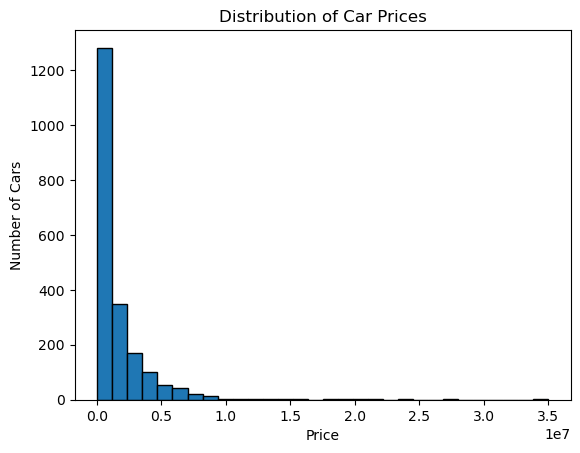

In [302]:
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Prices')
plt.show()

# Average Car Price by Year

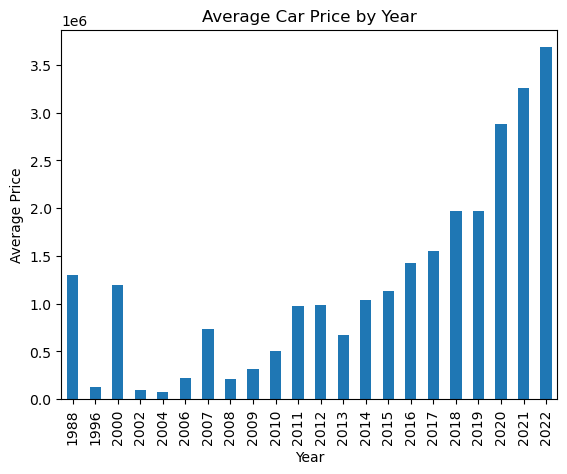

In [303]:
average_price_by_year = df.groupby('Year')['Price'].mean()
average_price_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price by Year')
plt.show()

# Number of Cars by Make

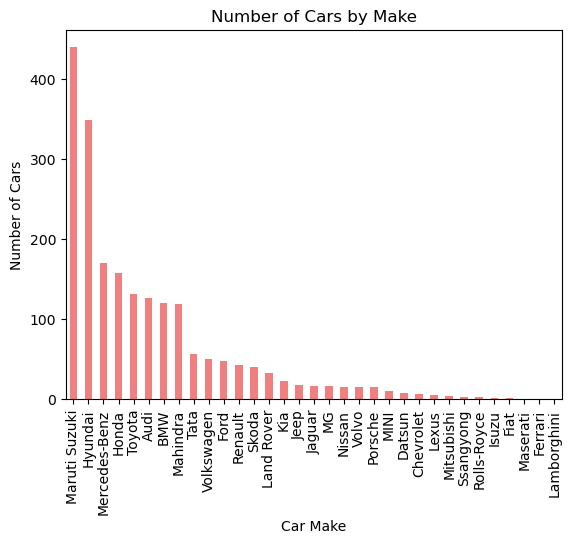

In [304]:
car_make_counts = df['Make'].value_counts()
car_make_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Make')
plt.show()

# Average Car Price by Mark

Text(0.5, 1.0, 'Average Car Price by Mark')

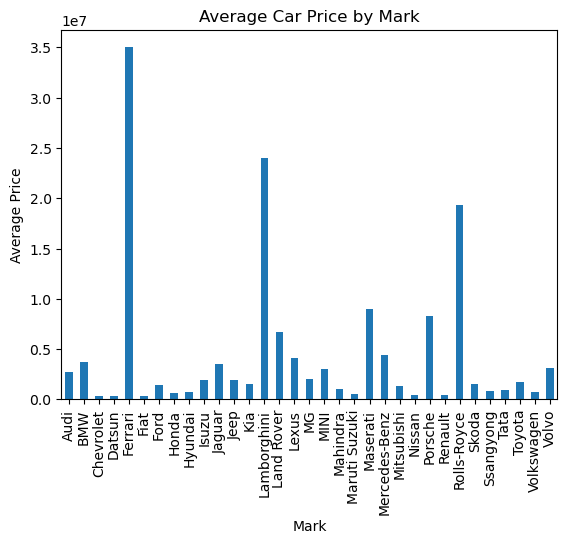

In [305]:
average_price_by_year = df.groupby('Make')['Price'].mean()
average_price_by_year.plot(kind='bar')
plt.xlabel('Mark')
plt.ylabel('Average Price')
plt.title('Average Car Price by Mark')

Text(0.5, 1.0, 'Average Car Price by model')

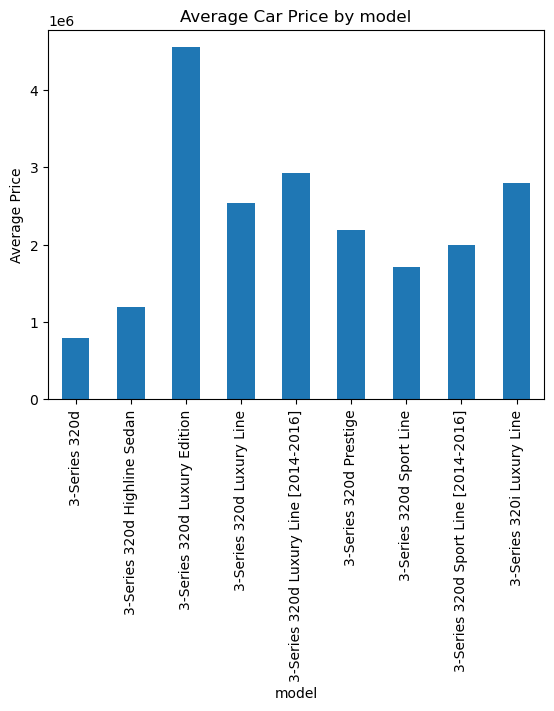

In [306]:
average_price_by_year = df.groupby('Model')['Price'].mean()
average_price_by_year[1:10].plot(kind='bar')
plt.xlabel('model')
plt.ylabel('Average Price')
plt.title('Average Car Price by model')

# Calculate the percentage of missing values in each column

In [307]:

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
Price_Group           0.000000
dtype: float64


# Handle missing values  for engine

In [308]:
# Extract numeric values from the "Engine" column
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

# Handle missing values (replace NaN with mean of non-missing values)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)


# Handle missing values  for categorical_cols

In [309]:
categorical_cols = ["Drivetrain",'Seating Capacity',"Max Power","Max Torque"]
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


# Handle missing values  for numerical_cols

In [310]:
numerical_cols = [ "Length", "Width", "Height", "Fuel Tank Capacity"]
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


# check for missing value

In [311]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

Make                  0.0
Model                 0.0
Price                 0.0
Year                  0.0
Kilometer             0.0
Fuel Type             0.0
Transmission          0.0
Location              0.0
Color                 0.0
Owner                 0.0
Seller Type           0.0
Engine                0.0
Max Power             0.0
Max Torque            0.0
Drivetrain            0.0
Length                0.0
Width                 0.0
Height                0.0
Seating Capacity      0.0
Fuel Tank Capacity    0.0
Price_Group           0.0
dtype: float64


# convert_to_numeric

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

def convert_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = pd.Categorical(df[column]).codes
    return df


df = convert_to_numeric(df)

# or

 # Use OneHotEncoder

In [313]:
# features = df.drop('Price_Group', axis=1)  # Features
# labels = df['Price_Group']  # Labels

# # Split the data into training and testing sets while maintaining class ratios
# features_train, features_test, labels_train, labels_test = train_test_split(
#     features, labels, test_size=0.2, random_state=42, stratify=labels)
# # Concatenate the training and testing sets for one-hot encoding
# df_combined = pd.concat([features_train, features_test], axis=0)

# # Select the categorical columns for one-hot encoding
# categorical_columns = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type','Drivetrain','Max Power','Max Torque']

# # Use OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to handle multicollinearity
# encoded_columns = pd.DataFrame(encoder.fit_transform(df_combined[categorical_columns]))
# encoded_columns.columns = encoder.get_feature_names_out(categorical_columns)

# # Drop the original categorical columns and concatenate the one-hot encoded columns
# df_combined = pd.concat([df_combined.drop(columns=categorical_columns), encoded_columns], axis=1)

# # Split the combined dataframe back into training and testing sets
# features_train = df_combined.iloc[:len(features_train)]
# features_test = df_combined.iloc[len(features_test):]

# # Display the encoded dataframes
# print(features_train)

# print("--------------------")
# print(features_test)

# find corr

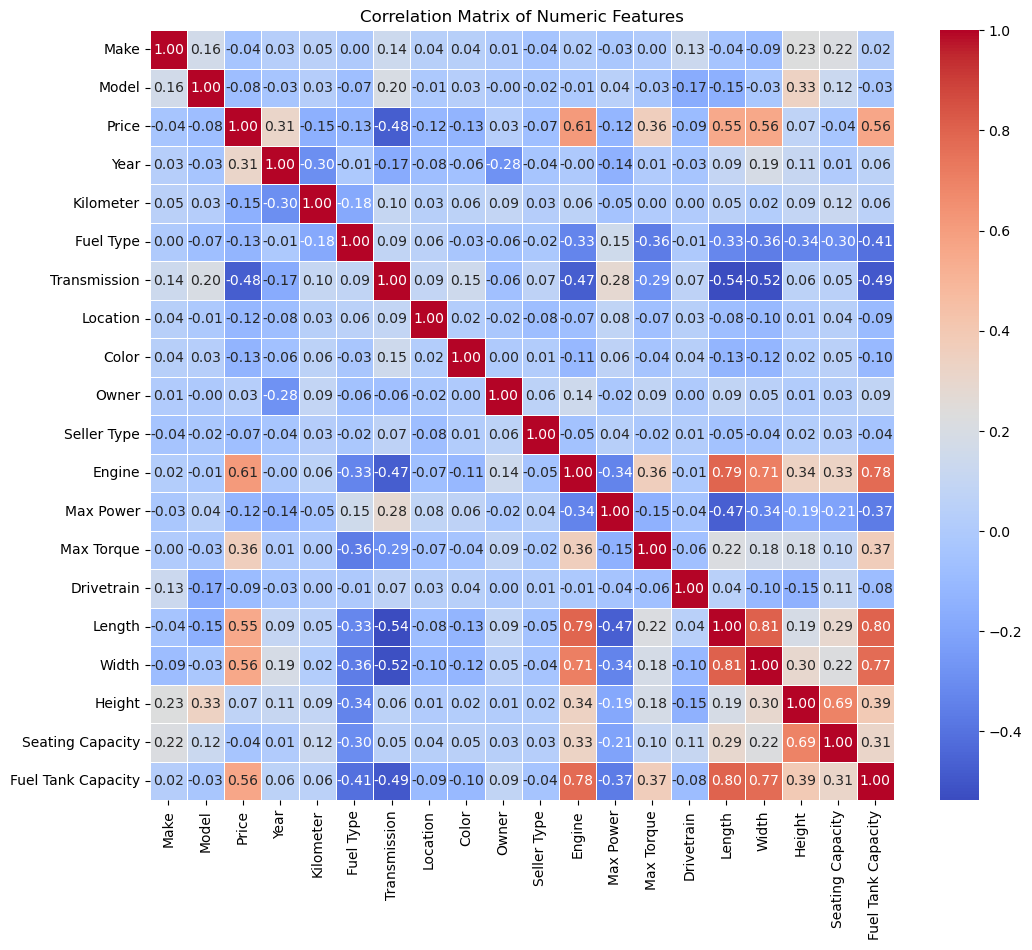

In [314]:



correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# correlated_features

In [315]:

highly_correlated_features = np.where(np.abs(correlation_matrix) > 0.7)
correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                       for x, y in zip(*highly_correlated_features) if x != y and x < y]

print('correlated_features :')
print(correlated_features)

correlated_features :
[('Engine', 'Length'), ('Engine', 'Width'), ('Engine', 'Fuel Tank Capacity'), ('Length', 'Width'), ('Length', 'Fuel Tank Capacity'), ('Width', 'Fuel Tank Capacity')]


# create new feature

In [316]:
df['Engine_Length_Width_Capacity'] = df['Engine'] + df['Length'] + df['Width'] + df['Fuel Tank Capacity']
df.drop(['Engine', 'Length', 'Width', 'Fuel Tank Capacity'], axis=1, inplace=True)
print(df.head())


   Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     7    106   505000  2017      87150          6             1        56   
1    19    802   450000  2014      75000          2             1        40   
2     8   1030   220000  2011      67000          6             1        39   
3    30    492   799000  2019      37500          6             1        41   
4    30    548  1950000  2018      69000          2             1        45   

   Color  Owner  Seller Type  Max Power  Max Torque  Drivetrain  Height  \
0      7      1            1        312           5           1  1505.0   
1     15      3            2        289          77           1  1555.0   
2      8      1            2        301          11           1  1550.0   
3     13      1            2        305          15           1  1510.0   
4      7      1            2         78         167           2  1795.0   

   Seating Capacity Price_Group  Engine_Length_Width_Capacity  
0         

# Lasso and Ridge

In [320]:
features = df.drop('Price_Group', axis=1)  # Features
labels = df['Price_Group']  # Labels

# Split the data into training and testing sets while maintaining class ratios
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)



lasso = Lasso()
lasso_params = {'alpha': [0.1,0.2, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(features_train, labels_train)
best_lasso = lasso_grid.best_estimator_

print(best_lasso)


ridge = Ridge()
ridge_params = {'alpha': [0.1,0.2, 1, 10]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(features_train, labels_train)
best_ridge = ridge_grid.best_estimator_

print(best_ridge)


Lasso(alpha=0.1)
Ridge(alpha=0.1)


# score

In [322]:
lasso_pred = best_lasso.predict(features_test)
lasso_rmse = np.sqrt(mean_squared_error(labels_test, lasso_pred))
lasso_r2 = r2_score(labels_test, lasso_pred)

print("lasso_rmse",lasso_rmse)
print("lasso_r2",lasso_r2)

ridge_pred = best_ridge.predict(features_test)
ridge_rmse = np.sqrt(mean_squared_error(labels_test, ridge_pred))
ridge_r2 = r2_score(labels_test, ridge_pred)

print("ridge_rmse",ridge_rmse)
print("ridge_r2",ridge_r2)

lasso_rmse 1.0565171423855182
lasso_r2 0.8329791879454783
ridge_rmse 1.0466245406616934
ridge_r2 0.836092312883896


# k fold k=5

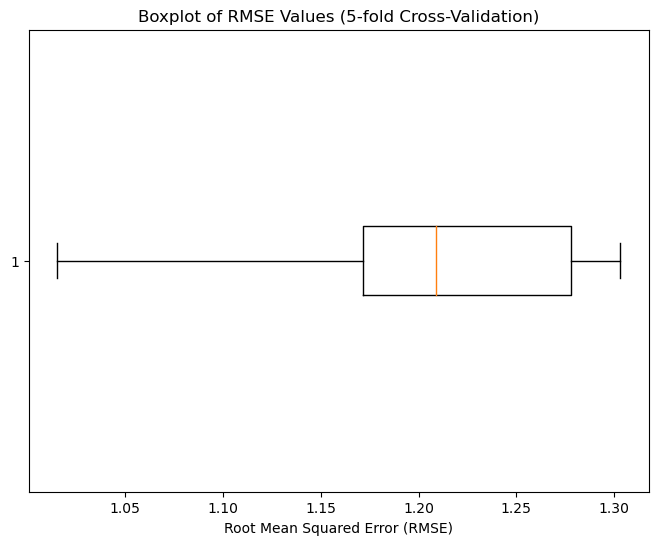

In [326]:
cross_val_scores = cross_val_score(best_lasso, features_train,labels_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-cross_val_scores)



plt.figure(figsize=(8, 6))
plt.boxplot(rmse_scores, vert=False)
plt.title('Boxplot of RMSE Values (5-fold Cross-Validation)')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.show()